<a href="https://colab.research.google.com/github/bigflyy/DeepLearningWithPython/blob/main/3IMDBReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

## Data

In [2]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [4]:
len(train_data[0])

218

218 слов

In [5]:
train_labels[0]

1

В каждом отзыве слова закодированы целыми числами. Всего мы их включили 10000 самых частых. Так что максимальное "слово" - 9999. А так это все слова.

In [6]:
word_index = imdb.get_word_index() # dictionary mapping words to integers.
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()]) # now we map ints to words

decoded_review = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # i -3 because... magic

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

наверное ? - значит что не входит в 10000 самых частых слов

In [8]:
min(reverse_word_index.keys())

1

In [9]:
max(reverse_word_index.keys())

88584

In [10]:
len(reverse_word_index.keys())

88584

In [11]:
reverse_word_index[1]

'the'

In [12]:
reverse_word_index[88584]

"'l'"

## Preprocessing

In [13]:
def vectorize_one_hot_encode(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, onelist in enumerate(sequence): # it is a lot of lists as samples
    for j in onelist: # we take the numbers from the list
      results[i,j] = 1 # this number is present in this list (i)
  return results

In [14]:
x_train = vectorize_one_hot_encode(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [15]:
x_test = vectorize_one_hot_encode(test_data)
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [16]:
train_labels.dtype

dtype('int64')

It should be float

In [17]:
y_train = np.asarray(train_labels,"float32")
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [67]:
y_test = np.asarray(test_labels).astype("float32")
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

## Model with 20 layers


In [19]:
  model = keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(16,activation="relu"),
      layers.Dense(1, "sigmoid")
  ])

In [20]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.6673 - loss: 0.6348 - val_accuracy: 0.8509 - val_loss: 0.4506
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8808 - loss: 0.3968 - val_accuracy: 0.8808 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9122 - loss: 0.2837 - val_accuracy: 0.8830 - val_loss: 0.3040
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9275 - loss: 0.2209 - val_accuracy: 0.8890 - val_loss: 0.2809
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9374 - loss: 0.1892 - val_accuracy: 0.8891 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9522 - loss: 0.1539 - val_accuracy: 0.8597 - val_loss: 0.3606
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9538 - loss: 0.1420 - val_accuracy: 0.8759 - val_loss: 0.3132
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9624 - loss: 0.1215 - val_accuracy: 0.8793 - 

In [27]:
history = history.history

In [29]:
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

[]

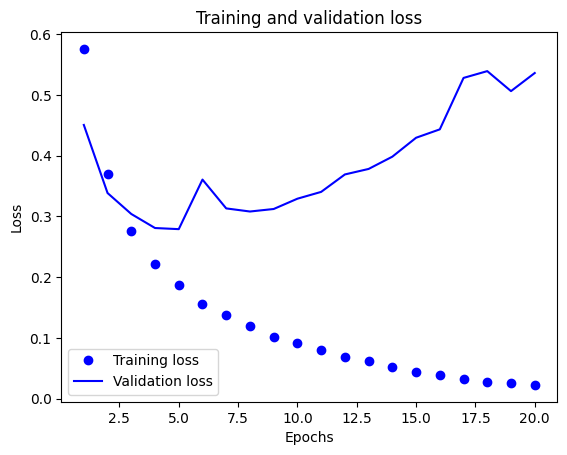

In [49]:
training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,21), training_loss, "bo", label="Training loss")
plt.plot(range(1,21), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

In [50]:
epochs

range(1, 21)

[]

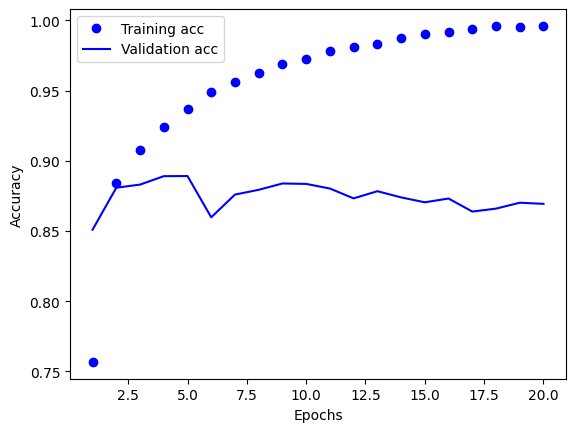

In [51]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

Overfitting (переобучивается)

## Model with 5 layers

In [68]:
  model = keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(16,activation="relu"),
      layers.Dense(1, "sigmoid")
  ])
  model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
  history = model.fit(x=partial_x_train, y=partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
  results = model.evaluate(x_test,y_test)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.7030 - loss: 0.5948 - val_accuracy: 0.8655 - val_loss: 0.3995
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8959 - loss: 0.3410 - val_accuracy: 0.8662 - val_loss: 0.3378
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9233 - loss: 0.2507 - val_accuracy: 0.8717 - val_loss: 0.3172
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9387 - loss: 0.2002 - val_accuracy: 0.8883 - val_loss: 0.2794
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9492 - loss: 0.1672 - val_accuracy: 0.8864 - val_loss: 0.2790
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8777 - loss: 0.2960


In [69]:
results

[0.295626163482666, 0.8796799778938293]

In [70]:
history = history.history

[]

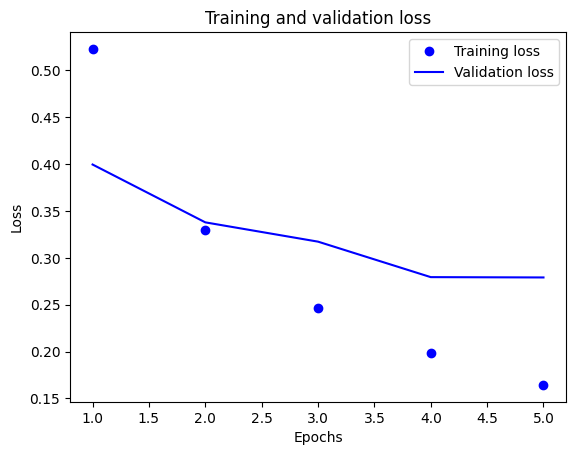

In [71]:
training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

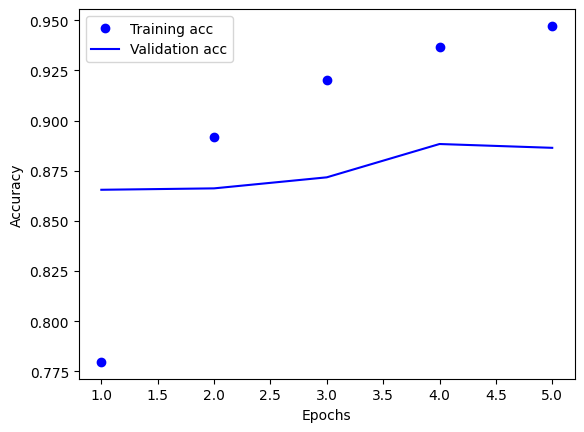

In [72]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

## Experiments

### 1 layers

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7074 - loss: 0.6048 - val_accuracy: 0.8637 - val_loss: 0.4367
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8854 - loss: 0.3883 - val_accuracy: 0.8701 - val_loss: 0.3625
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9064 - loss: 0.3041 - val_accuracy: 0.8787 - val_loss: 0.3219
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9197 - loss: 0.2553 - val_accuracy: 0.8861 - val_loss: 0.2939
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9321 - loss: 0.2161 - val_accuracy: 0.8805 - val_loss: 0.2933
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8767 - loss: 0.3062


[]

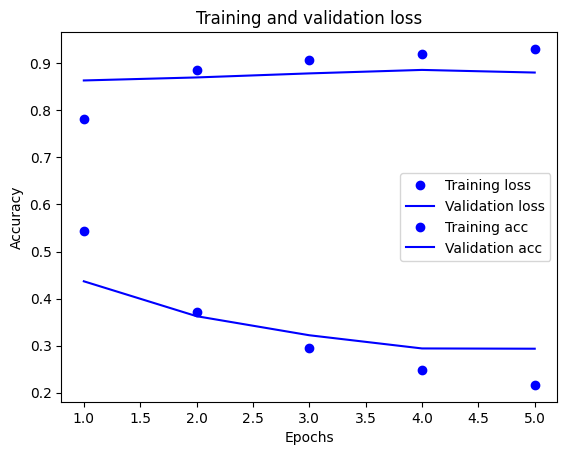

In [74]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history


In [80]:
results

[0.3037603795528412, 0.8786799907684326]

[]

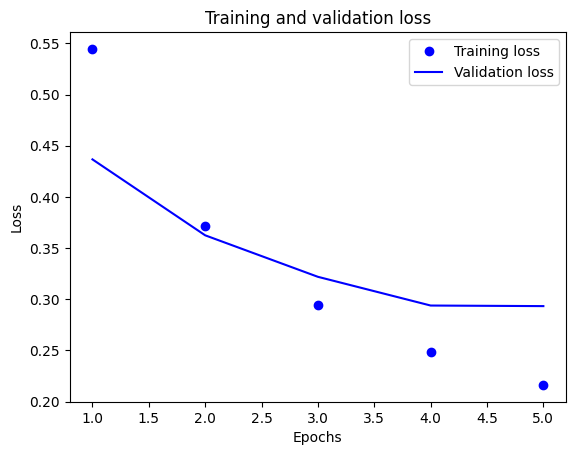

In [78]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

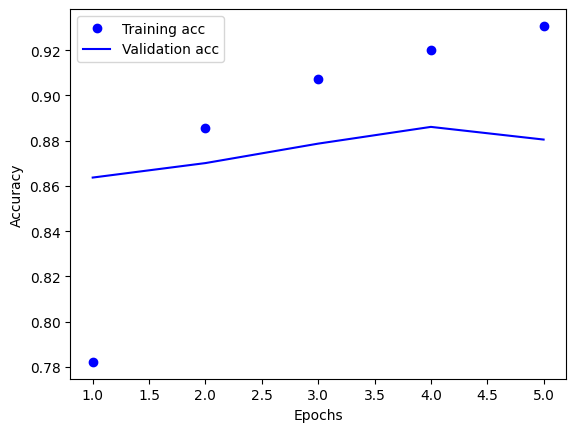

In [79]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### 1 layers 256 neurons

In [89]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6828 - loss: 0.5856 - val_accuracy: 0.8460 - val_loss: 0.3791
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8871 - loss: 0.3128 - val_accuracy: 0.8749 - val_loss: 0.3061
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8989 - loss: 0.2632 - val_accuracy: 0.8651 - val_loss: 0.3216
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9201 - loss: 0.2140 - val_accuracy: 0.8840 - val_loss: 0.2820
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9344 - loss: 0.1828 - val_accuracy: 0.8840 - val_loss: 0.2871
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8749 - loss: 0.3006


In [90]:
results

[0.29838889837265015, 0.8771600127220154]

[]

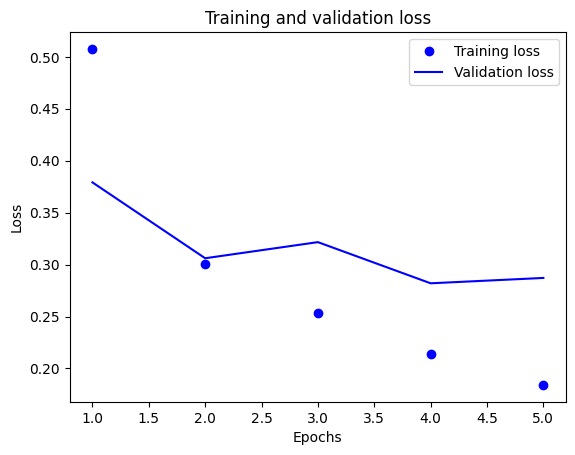

In [91]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

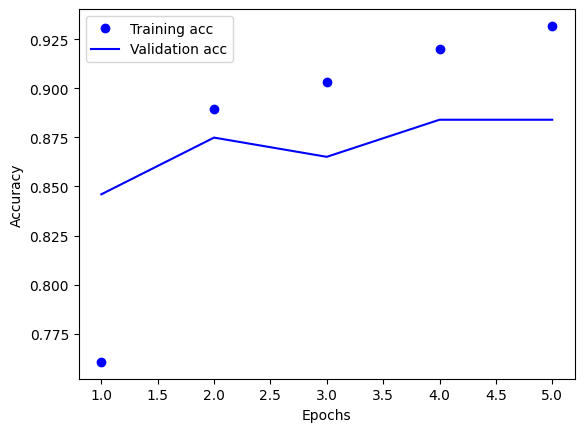

In [92]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### 4 layers

In [93]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history


Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.6450 - loss: 0.6411 - val_accuracy: 0.8168 - val_loss: 0.4505
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8788 - loss: 0.3679 - val_accuracy: 0.8512 - val_loss: 0.3569
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9117 - loss: 0.2580 - val_accuracy: 0.8815 - val_loss: 0.2995
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9335 - loss: 0.1928 - val_accuracy: 0.8725 - val_loss: 0.3194
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9444 - loss: 0.1577 - val_accuracy: 0.8821 - val_loss: 0.2955
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9669 - loss: 0.1169 - val_accuracy: 0.8838 - val_loss: 0.3059
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8714 - loss: 0.3295


In [94]:
results

[0.32527971267700195, 0.8743600249290466]

[]

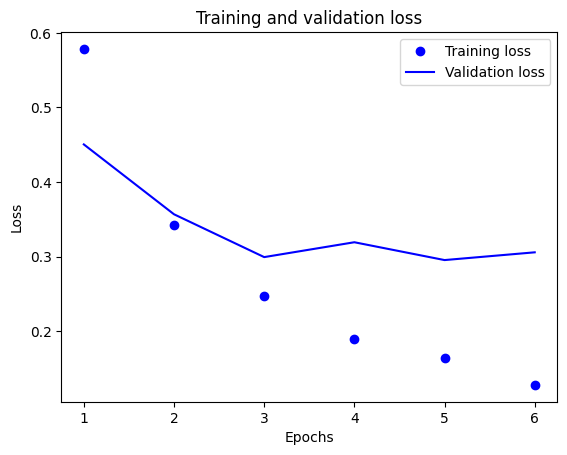

In [95]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

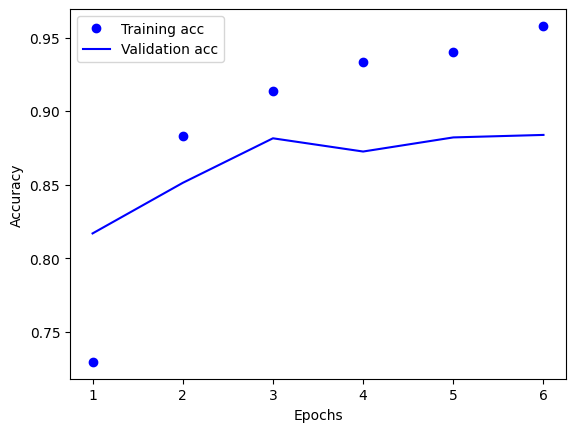

In [96]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### Different loss function : MSE

In [97]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="mse", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.7000 - loss: 0.2094 - val_accuracy: 0.8574 - val_loss: 0.1298
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8803 - loss: 0.1110 - val_accuracy: 0.8795 - val_loss: 0.1006
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9097 - loss: 0.0829 - val_accuracy: 0.8872 - val_loss: 0.0896
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9283 - loss: 0.0657 - val_accuracy: 0.8807 - val_loss: 0.0893
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9383 - loss: 0.0570 - val_accuracy: 0.8788 - val_loss: 0.0903
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9459 - loss: 0.0500 - val_accuracy: 0.8866 - val_loss: 0.0829
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8815 - loss: 0.0877


In [98]:
results

[0.08686728775501251, 0.8833600282669067]

[]

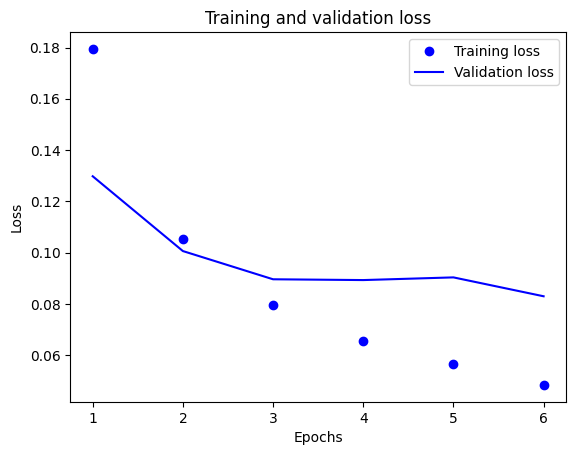

In [99]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

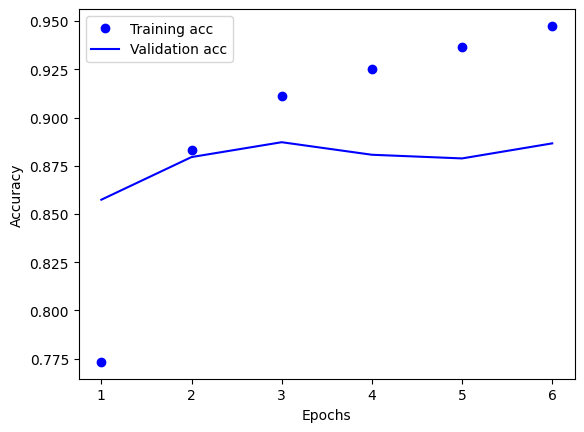

In [100]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()

### Different activation function: tanh

In [101]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16,activation="tanh"),
    layers.Dense(1, "sigmoid")
])
model.compile(optimizer='rmsprop', loss="mse", metrics=["accuracy"])
history = model.fit(x=partial_x_train, y=partial_y_train, epochs=6, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)
history = history.history

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6936 - loss: 0.1971 - val_accuracy: 0.8594 - val_loss: 0.1188
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8939 - loss: 0.0970 - val_accuracy: 0.8782 - val_loss: 0.0946
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9188 - loss: 0.0682 - val_accuracy: 0.8864 - val_loss: 0.0848
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9345 - loss: 0.0549 - val_accuracy: 0.8892 - val_loss: 0.0819
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9499 - loss: 0.0439 - val_accuracy: 0.8791 - val_loss: 0.0884
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9637 - loss: 0.0336 - val_accuracy: 0.8689 - val_loss: 0.0984
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.1068


In [102]:
results

[0.10666905343532562, 0.8565599918365479]

[]

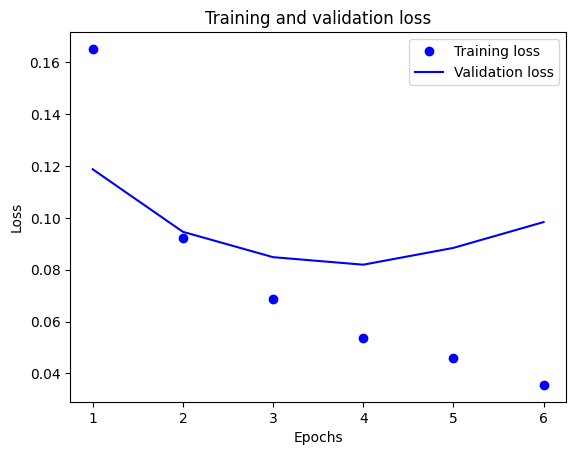

In [103]:

training_loss = history['loss']
val_loss = history['val_loss']
epochs = range(1,len(training_loss)+1)
plt.plot(range(1,len(training_loss)+1), training_loss, "bo", label="Training loss")
plt.plot(range(1,len(training_loss)+1), val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and validation loss")
plt.plot()

[]

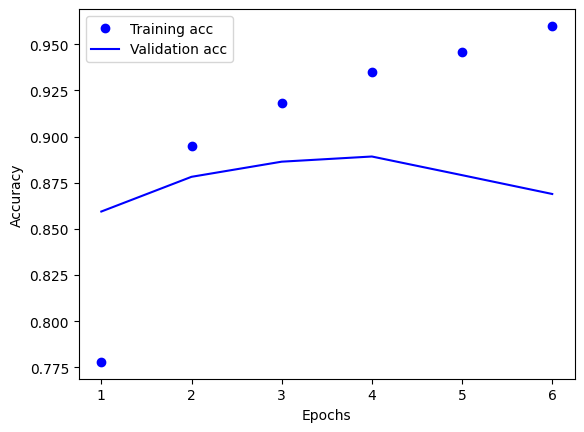

In [104]:
training_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.plot(epochs, training_acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot()